In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

# Implement Logistic Regression

This will be helpful to further familiarize yourself with Numpy and how Logistic Regression actually works.
If you face any problems, feel free to contact us in Slack

### Load the breast cancer dataset (from sklearn)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer_dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print(cancer_dataset.target_names)

['malignant' 'benign']


In [5]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
X = cancer_dataset.data

In [7]:
y = cancer_dataset.target

In [8]:
X.shape

(569, 30)

In [9]:
y.shape

(569,)

In [10]:
y = y.reshape(-1,1)
y.shape

(569, 1)

### Train test split

In [11]:
# Code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape

(455, 30)

In [13]:
X_test.shape

(114, 30)

In [14]:
y_train.shape

(455, 1)

In [15]:
y_test.shape

(114, 1)

### Apply feature scaling on the data

In [16]:
# Code here
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

class Standardizer:
    
    def fit(self, data):
        self.__mean = np.mean(data)
        self.__std = np.std(data)
    
    def transform(self, data):
        transformed = ( data - self.__mean ) / self.__std
        return transformed
    
    def fit_transform(self, data):
        self.__mean = np.mean(data)
        self.__std = np.std(data)
        transformed = ( data - self.__mean ) / self.__std
        return transformed

std_scaler = Standardizer()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform( X_train )
# X_test = scaler.transform( X_test )


In [18]:
X_train.shape

(455, 30)

In [19]:
X_test.shape

(114, 30)

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [20]:
W = np.random.randn(30,1)  # Weights
alpha = 1e-3 # Learning Rate

In [21]:
W.shape

(30, 1)

In [22]:
alpha

0.001

### Define sigmoid and its derivative
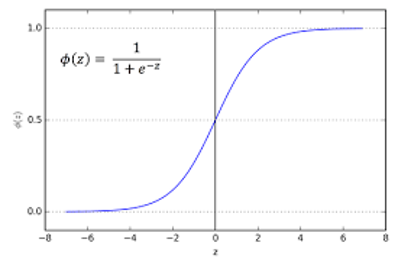

In [23]:
def sigmoid(X: np.array):
    # Apply sigmoid to X and return 
    return 1/(1 + np.exp(-X))

# def sigmoid_(X: np.array):
#     # return derivative of sigmoid
#     eps = 1e-6
#     return (sigmoid(X+eps) - sigmoid(X-eps)) / (2*eps)

def sigmoid_(X: np.array):
    sig = sigmoid(X)
    return sig*(1-sig)


### Prediction methods

In [24]:
def predict_prob(X, W):
    # Return the class probabilities here
    Z = X.dot(W)
    return sigmoid(Z)

### Define the Cross entropy loss function

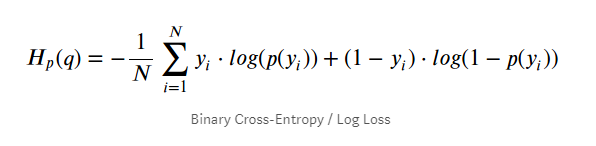

In [25]:
# Code here
def binary_cross_entropy(y, yhat):
    total = np.sum(y*np.log(yhat)+(1-y)*np.log(1-yhat))
    loss = (-1/y.shape[0])*total
    return loss

In [26]:
yhat = predict_prob(X_train, W)
print(yhat)

[[6.94834212e-02]
 [4.56990845e-01]
 [6.64613256e-04]
 [3.50911338e-01]
 [3.21243960e-01]
 [5.17916963e-01]
 [1.96908290e-01]
 [4.50027936e-01]
 [4.32919404e-01]
 [5.33614303e-01]
 [6.21112024e-03]
 [4.74847338e-01]
 [3.07436418e-01]
 [2.86318113e-01]
 [5.12930247e-04]
 [1.79596410e-01]
 [1.13916888e-01]
 [1.75968475e-01]
 [3.44290089e-01]
 [3.83937125e-01]
 [3.91599782e-01]
 [2.09937219e-01]
 [4.64872723e-01]
 [3.04892442e-01]
 [2.48058680e-01]
 [4.05873524e-01]
 [2.55457543e-01]
 [2.48488851e-01]
 [2.11325266e-01]
 [5.54042083e-01]
 [3.58937438e-01]
 [2.05169319e-01]
 [3.52510711e-01]
 [3.11044222e-01]
 [4.57265172e-01]
 [4.99505999e-01]
 [5.28908100e-01]
 [3.41335769e-01]
 [5.45961911e-01]
 [7.89545746e-02]
 [4.54172939e-01]
 [1.70410324e-01]
 [3.29377696e-01]
 [1.19777587e-01]
 [4.21678408e-01]
 [5.56847576e-02]
 [2.06722491e-02]
 [4.69341141e-01]
 [4.52517061e-02]
 [2.81999585e-01]
 [2.16394917e-02]
 [8.50180951e-02]
 [3.48016047e-01]
 [3.89299671e-01]
 [2.83838907e-01]
 [3.899180

In [27]:
loss = binary_cross_entropy(y_train, yhat)
print(loss)

0.6386004747622358


# Solve using Gradient Descent

### Calculate gradient
For practice, you can try to derive the gradient using pen and paper

In [28]:
def compute_gradient(X, y, yhat, W):
    # Code here
    dZ = yhat - y
    dW = 1 / len(X) * X.T.dot(dZ)
    return dW

### Update Weights

In [29]:
# Code here
W = W - alpha*compute_gradient(X_train, y_train, yhat,W)

### Repeat for N- Iterations

In [30]:
N = 1000
losses = []
for i in range(N):
    # Predict
    yhat = predict_prob(X_train, W)
    
    # Calculate Loss
    loss = binary_cross_entropy(y_train, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(X_train, y_train, yhat, W)
    
    # Update the weights
    W = W - alpha*dW
    
    losses.append(loss)

### Plot the loss curve

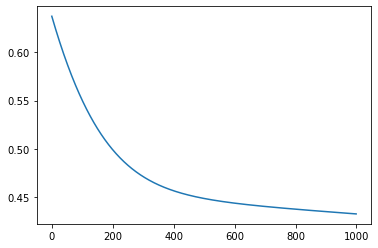

In [31]:
# Loss curve here
plt.plot(losses)

### Calculate the classification report and the confusion matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Scores here
yhat = [1 if yhat[i] > 0.5 else 0 for i in range(len(yhat))]
con_matrix = confusion_matrix(y_train, yhat)
con_matrix

array([[133,  34],
       [  2, 286]])

# BONUS: Create a LogisticRegression Class [OPTIONAL]
Create a Sklearn-like API

In [67]:
class LogisticRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=1000):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter
        ...

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

In [68]:
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X)

### Compare metrics with Sklearn's implementation

In [69]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [ ]:
sklearn_model = SKLogisticRegression()
sklearn_model.fit(X, y)
sklearn_predictions = sklearn_model.predict(X)

In [ ]:
### compare classification report and confusion matrix here